In [1]:
import pandas as pd

from pandas_datareader import data
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [2]:
fig_size_1 = (12, 4)
fig_size_2 = (6, 3)
today = datetime.today().strftime('%Y-%m-%d')
start_date = '1970-01-02'
end_date = today
three_months = (datetime.today()-relativedelta(months=3)).strftime('%Y-%m-%d')
six_months = (datetime.today()-relativedelta(months=6)).strftime('%Y-%m-%d')
one_year = (datetime.today()-relativedelta(years=1)).strftime('%Y-%m-%d')

In [3]:
tickers = ['AMZN', 'AAPL', 'FB', 'GOOGL', 'MSFT', 'UBER',
           'XOM', 'BA', 'DAL', 'UAL', 'AAL',
           'SMH', 'XLE', 'IVV', 'VNQ', 'VCSH']

num_shares = {'AMZN': 17, 'AAPL': 208, 'FB': 74, 'GOOGL': 10, 'MSFT': 87, 'UBER': 554,
              'XOM': 361, 'BA': 87, 'DAL': 141, 'UAL': 129, 'AAL': 316,
              'SMH': 57, 'XLE': 431, 'IVV': 64, 'VNQ': 118, 'VCSH': 384, 'CASH': 108443}

cost_basis = {'AMZN': 1708.54, 'AAPL': 45.57, 'FB': 168.62, 'GOOGL': 1110.79, 'MSFT': 95.20, 'UBER': 21.65,
              'XOM': 41.51, 'BA': 137.98, 'DAL': 23.61, 'UAL': 25.73, 'AAL': 10.54,
              'SMH': 110.00, 'XLE': 30.12, 'IVV': 267.39, 'VNQ': 76.10, 'VCSH': 78.07, 'CASH': 1}

asset_type = {'AMZN': 'Stock', 'AAPL': 'Stock', 'FB': 'Stock', 'GOOGL': 'Stock', 'MSFT': 'Stock', 'UBER': 'Stock',
              'XOM': 'Stock', 'BA': 'Stock', 'DAL': 'Stock', 'UAL': 'Stock', 'AAL': 'Stock',
              'SMH': 'ETF', 'XLE': 'ETF', 'IVV': 'Index', 'VNQ': 'REIT', 'VCSH': 'Bond', 'CASH': 'Cash'}

In [4]:
df = pd.DataFrame()

for ticker in tickers:
    df_temp = data.DataReader(ticker, 'yahoo', start_date, end_date).reset_index()[['Date', 'Close']]
    df_temp['Ticker'] = [ticker] * len(df_temp)
    df_temp['Shares'] = [num_shares[ticker]] * len(df_temp)
    df_temp['Type'] = [asset_type[ticker]] * len(df_temp)
    df_temp['Cost'] = [cost_basis[ticker]] * len(df_temp)
    df = df.append(df_temp)

df = df.append({'Ticker': 'CASH', 'Date' : df['Date'].max() , 'Close' : 1, 'Shares': num_shares['CASH'],
                'Type': asset_type['CASH'], 'Cost': cost_basis['CASH']}, ignore_index=True)

df['Mkt Val'] = df['Shares'] * df['Close']
df['Cost Basis'] = df['Shares'] * df['Cost']
df['Change'] = df['Mkt Val'] - df['Cost Basis']
df['Change %'] = 100*df['Change']/df['Cost Basis']

df_final = df.groupby(['Ticker']).tail(1).set_index('Ticker')
df_final['Mkt Val %'] = 100*df_final['Mkt Val']/df_final['Mkt Val'].sum()
df_final['Cost Basis %'] = 100*df_final['Cost Basis']/df_final['Cost Basis'].sum()
df_final

,Date,Close,Shares,Type,Cost,Mkt Val,Cost Basis,Change,Change %,Mkt Val %,Cost Basis %
Ticker,,,,,,,,,,,
AMZN,2020-11-16,3121.050049,17,Stock,1708.54,53057.850830,29045.18,24012.670830,82.673514,12.965391,9.582055
AAPL,2020-11-16,120.449997,208,Stock,45.57,25053.599365,9478.56,15575.039365,164.318624,6.122180,3.126993
FB,2020-11-16,278.029907,74,Stock,168.62,20574.213135,12477.88,8096.333135,64.885486,5.027582,4.116474
GOOGL,2020-11-16,1784.998657,10,Stock,1110.79,17849.986572,11107.90,6742.086572,60.696320,4.361881,3.664515
MSFT,2020-11-16,217.320007,87,Stock,95.20,18906.840637,8282.40,10624.440637,128.277319,4.620138,2.732378
UBER,2020-11-16,49.325001,554,Stock,21.65,27326.050423,11994.10,15331.950423,127.829103,6.677484,3.956874
XOM,2020-11-16,37.935001,361,Stock,41.51,13694.535496,14985.11,-1290.574504,-8.612379,3.346442,4.943614
BA,2020-11-16,200.253998,87,Stock,137.98,17422.097809,12004.26,5417.837809,45.132626,4.257321,3.960226
DAL,2020-11-16,38.098801,141,Stock,23.61,5371.930893,3329.01,2042.920893,61.367220,1.312703,1.098246


<AxesSubplot:title={'center':'Change'}, xlabel='Ticker'>

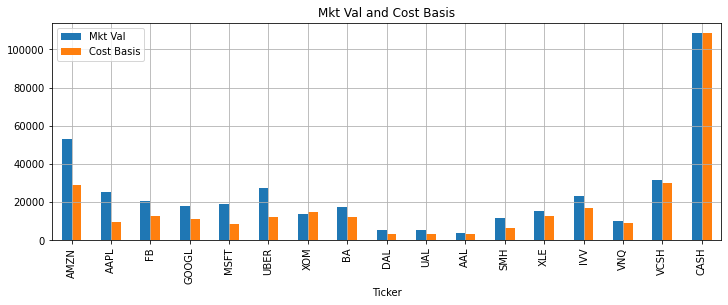

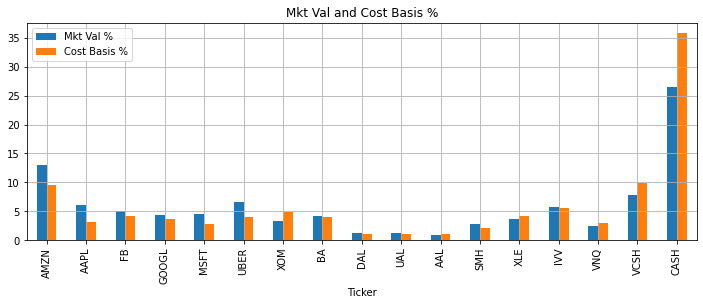

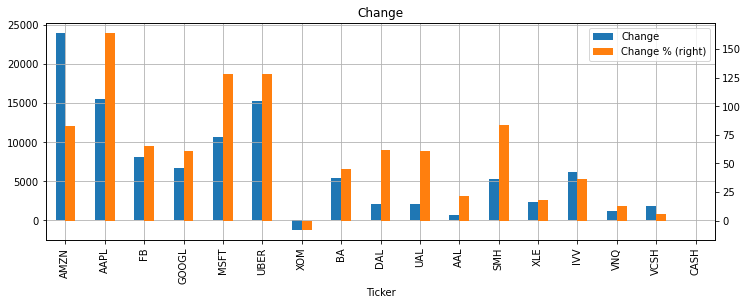

In [5]:
df_final.plot(y=['Mkt Val', 'Cost Basis'], kind='bar',
                   figsize=fig_size_1, grid=True, title='Mkt Val and Cost Basis')
df_final.plot(y=['Mkt Val %', 'Cost Basis %'], kind='bar',
                   figsize=fig_size_1, grid=True, title='Mkt Val and Cost Basis %')
df_final.plot(y=['Change', 'Change %'], secondary_y='Change %', kind='bar',
                   figsize=fig_size_1, grid=True, title='Change')

In [6]:
df_final_type = df_final.groupby('Type').sum()[['Mkt Val', 'Cost Basis']]
df_final_type['Mkt Val %'] = 100*df_final_type['Mkt Val']/df_final_type['Mkt Val'].sum()
df_final_type['Cost Basis %'] = 100*df_final_type['Cost Basis']/df_final_type['Cost Basis'].sum()
df_final_type['Change'] = df_final_type['Mkt Val'] - df_final_type['Cost Basis']
df_final_type['Change %'] = 100 * df_final_type['Change'] / df_final_type['Cost Basis']
df_final_type

,Mkt Val,Cost Basis,Mkt Val %,Cost Basis %,Change,Change %
Type,,,,,,
Bond,31824.000000,29978.88,7.776617,9.890084,1845.120000,6.154733
Cash,108443.000000,108443.00,26.499488,35.775533,0.000000,0.000000
ETF,26875.798828,19251.72,6.567459,6.351176,7624.078828,39.602066
Index,23265.919922,17112.96,5.685337,5.645595,6152.959922,35.954972
REIT,10158.619568,8979.80,2.482394,2.962452,1178.819568,13.127459
Stock,208659.435257,119354.21,50.988706,39.375160,89305.225257,74.823691


<AxesSubplot:title={'center':'Change %'}, xlabel='Type'>

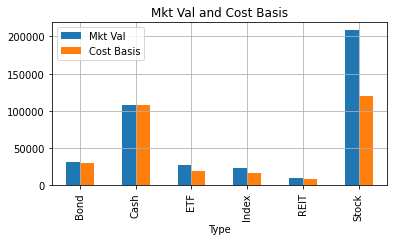

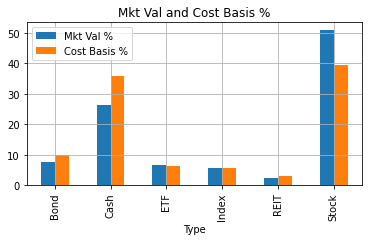

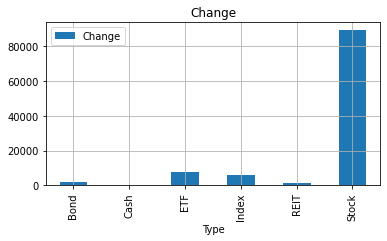

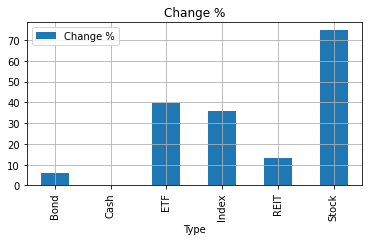

In [7]:
df_final_type.plot(y=['Mkt Val', 'Cost Basis'], kind='bar',
                   figsize=fig_size_2, grid=True, title='Mkt Val and Cost Basis')
df_final_type.plot(y=['Mkt Val %', 'Cost Basis %'], kind='bar',
                   figsize=fig_size_2, grid=True, title='Mkt Val and Cost Basis %')
df_final_type.plot(y='Change', kind='bar',
                   figsize=fig_size_2, grid=True, title='Change')
df_final_type.plot(y='Change %', kind='bar',
                   figsize=fig_size_2, grid=True, title='Change %')

In [8]:
df[df['Ticker'] == 'CASH'][['Mkt Val']].values[0][0]

108443.0

In [9]:
mkt_val = (df[df['Ticker'] != 'CASH'].groupby('Date').sum()['Mkt Val'])
# mkt_val[['Mkt Val']] = mkt_val[['Mkt Val']] + df[df['Ticker'] == 'CASH'][['Mkt Val']].values[0][0]
mkt_val = mkt_val.reset_index()
mkt_val.tail(7)

,Date,Mkt Val
12828,2020-11-06,290123.081251
12829,2020-11-09,294884.679180
12830,2020-11-10,291578.699337
12831,2020-11-11,293633.495850
12832,2020-11-12,290730.237736
12833,2020-11-13,295439.602173
12834,2020-11-16,300783.773575


<AxesSubplot:title={'center':'Portfolio Value'}, xlabel='Date'>

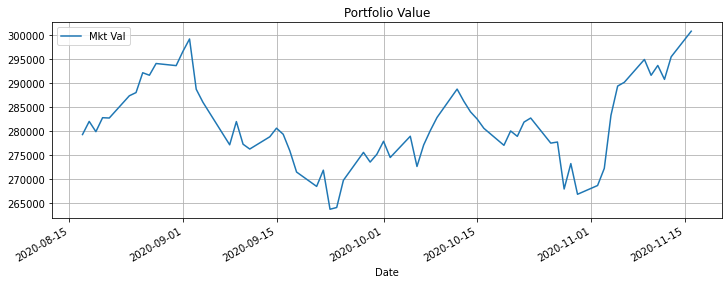

In [10]:
mkt_val[(mkt_val['Date'] >= three_months) & (mkt_val['Date'] <= end_date)].plot(
    x='Date', y=['Mkt Val'],
    figsize=fig_size_1, grid=True, title='Portfolio Value')